In this exercise you'll try to build a neural network that predicts the price of a house according to a simple formula.

So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

## Global Parameters

In [3]:
TRAIN_SIZE = 5000

In [4]:
MAX_NUMBER_BEDROMS = 100

In [5]:
TRAIN_SPLIT = 0.8
TEST_SPLIT = 0.1
VALIDATION_SPLIT = 0.1

### Creating the data

In [6]:
Y = np.arange(50, MAX_NUMBER_BEDROMS*50+1, 50) # We don't start at 0 because 0 Bedrooms + 1house is still 50K

In [7]:
Y = np.array([Y for train_step in range(TRAIN_SIZE//MAX_NUMBER_BEDROMS)]).flatten()

In [8]:
X = np.arange(0,MAX_NUMBER_BEDROMS, 1)

In [9]:
X = np.array([X for train_step in range(TRAIN_SIZE//MAX_NUMBER_BEDROMS)]).flatten()

In [10]:
Y.reshape(-1,1).shape

(5000, 1)

In [11]:
Y = Y.reshape(-1,1)
X = X.reshape(-1,1)

In [12]:
X.shape

(5000, 1)

In [13]:
Y.shape

(5000, 1)

### Splitting the dataset

In [14]:
X_train, Y_train = X[:int(TRAIN_SIZE*TRAIN_SPLIT)], Y[:int(TRAIN_SIZE*TRAIN_SPLIT)]

In [15]:
X_test, Y_test = X[int(TRAIN_SIZE*TRAIN_SPLIT):int(TRAIN_SIZE*(TRAIN_SPLIT+TEST_SPLIT)),...], Y[int(TRAIN_SIZE*TRAIN_SPLIT):int(TRAIN_SIZE*(TRAIN_SPLIT+TEST_SPLIT)),...]

In [16]:
X_valid, Y_valid = X[int(TRAIN_SIZE*(TRAIN_SPLIT+TEST_SPLIT)):, ...], Y[int(TRAIN_SIZE*(TRAIN_SPLIT+TEST_SPLIT)):,...]

In [17]:
print("Trainset: {}".format(X_train.shape))
print("Testset: {}".format(X_test.shape))
print("ValidationSet: {}".format(X_valid.shape))

Trainset: (4000, 1)
Testset: (500, 1)
ValidationSet: (500, 1)


### Creating the dataset

In [18]:
_X = tf.data.Dataset.from_tensor_slices(X_train)

2021-09-28 15:01:48.368180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 15:01:48.376258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 15:01:48.376634: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 15:01:48.377500: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [19]:
for x in _X.take(3):
    print(x)

tf.Tensor([0], shape=(1,), dtype=int64)
tf.Tensor([1], shape=(1,), dtype=int64)
tf.Tensor([2], shape=(1,), dtype=int64)


In [20]:
_Y = tf.data.Dataset.from_tensor_slices(Y_train)

In [21]:
dataset = tf.data.Dataset.zip((_X, _Y))

In [22]:
dataset = dataset.shuffle(buffer_size=100, seed = 101)

In [23]:
#dataset = dataset.batch(32, drop_remainder=True) # 

In [24]:
for x,y in dataset.take(1):
    print(x.shape)
    print(y.shape)
    
    print(x)
    print(y)

(1,)
(1,)
tf.Tensor([13], shape=(1,), dtype=int64)
tf.Tensor([700], shape=(1,), dtype=int64)


## Generating the model 

In [25]:
# I think we need a shape like this [1, X]

In [61]:
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (None, 1), name = "input"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu, name = "dense_1"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu, name = "dense_2"),
    tf.keras.layers.Dense(1, name="out")
])

In [62]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss = tf.keras.losses.mean_squared_error, metrics = ["mse"])

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, None, 1)           2         
_________________________________________________________________
dense_1 (Dense)              (None, None, 10)          20        
_________________________________________________________________
dense_2 (Dense)              (None, None, 10)          110       
_________________________________________________________________
out (Dense)                  (None, None, 1)           11        
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________


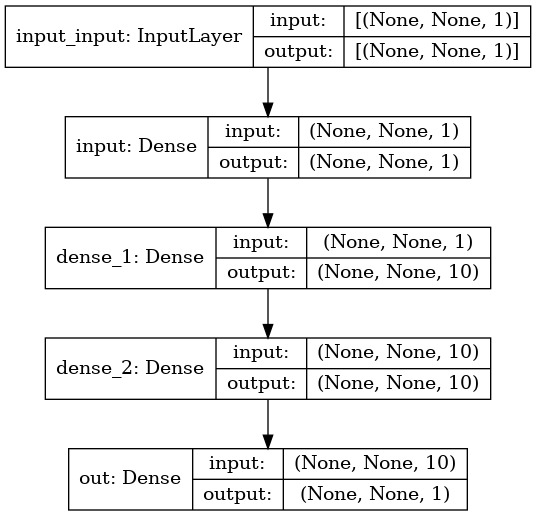

In [64]:
keras.utils.plot_model(model, show_shapes = True)

In [65]:
history = model.fit(dataset, epochs = 4, validation_data=(X_valid, Y_valid))

Epoch 1/4
4000/4000 [==============================] - 7s 2ms/step - loss: 1166737.7500 - mse: 1166737.7500 - val_loss: 9.1655 - val_mse: 9.1655
Epoch 2/4
4000/4000 [==============================] - 7s 2ms/step - loss: 5.0618 - mse: 5.0618 - val_loss: 0.9037 - val_mse: 0.9037
Epoch 3/4
4000/4000 [==============================] - 7s 2ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 8.7982e-08 - val_mse: 8.7982e-08
Epoch 4/4
4000/4000 [==============================] - 7s 2ms/step - loss: 5.0235 - mse: 5.0235 - val_loss: 8.9072e-04 - val_mse: 8.9072e-04


In [66]:
import pandas as pd

In [67]:
df = pd.DataFrame(history.history)

<AxesSubplot:>

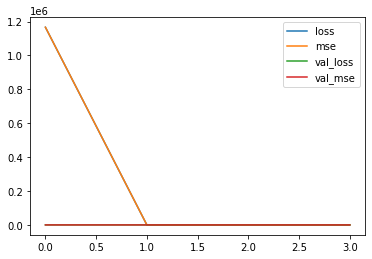

In [68]:
df.plot()

## Creating the dataset

In [69]:
model.predict([7])

array([[[400.04755]]], dtype=float32)

In [ ]:
# GRADED FUNCTION: house_model
def house_model(y_new):
    xs = # Your Code Here#
    ys = # Your Code Here#
    model = # Your Code Here#
    model.compile(# Your Code Here#)
    model.fit(# Your Code here#)
    return model.predict(y_new)[0]

In [ ]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);